### Figure 2
 

In [1]:
## packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from scipy import stats

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-5zhpxugt because the default path (/home/ronaldo/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


## All areas

In [2]:
# paths to load data
pathData = '/home/ronaldo/Dados/ProjectUfabc/MouseData/SimulationData/'
pathFln = '/home/ronaldo/github/ProjectUfabc/MouseKennedySNN/Data/Connectome/Kennedy.mat'

# Number of areas
Nareas=19
# Numver of trials
Ntrials=10

#### FLN

In [3]:
# Structural Connectivity
# Fln
# load FLNs
conn = loadmat(pathFln)
fln=conn['Fln']
# assign nan to diagonal
np.fill_diagonal(fln, np.nan)

# vetor Fln
vetorFln=fln.flatten()

# remove nan from Fln
vetorFln=vetorFln[~np.isnan(vetorFln)]

#### GPDC Total

In [4]:
# Gpdc (Downsample 1kHz)

# matrix to store gpdc values
vetorGpdc=np.zeros((Nareas*Nareas-Nareas,Ntrials)) #(i->j)


for i in range(Ntrials):
    #  load GPDC
    data = np.load(pathData+'/Seed'+str(i+1)+'/gpdc.npz')
    # gpdc values
    gpdc=data['arr_1']
    # take peak of gpdc 
    temp=np.max(gpdc[:,:,:],axis=2).T
    # assign nan to diagonal
    np.fill_diagonal(temp,np.nan)
    temp=temp.flatten()
    # vetor Gpdc without nan
    vetorGpdc[:,i]=temp[~np.isnan(temp)]


In [5]:
# index

trials=1000
samples=80

matrixIdx=np.zeros((trials,samples))
for i in range(trials):
    matrixIdx[i,:]=np.random.choice(np.arange(np.size(vetorFln)), size=samples, replace=False)
    
# check duplicates
unq, count = np.unique(matrixIdx, axis=0, return_counts=True)

if np.sum(count)>np.size(vetorFln):
   print('There are duplicates') 

There are duplicates


In [6]:
# Falta calcular a correlação
correlation=[]

for i in range(trials):
    flns=vetorFln[np.int64(matrixIdx[i,:])]
    gpdc=vetorGpdc[np.int64(matrixIdx[i,:]),:]  
    for j in range(Ntrials):              
        correlation.append(stats.pearsonr(flns,gpdc[:,j])[0])

(0.0, 600.0)

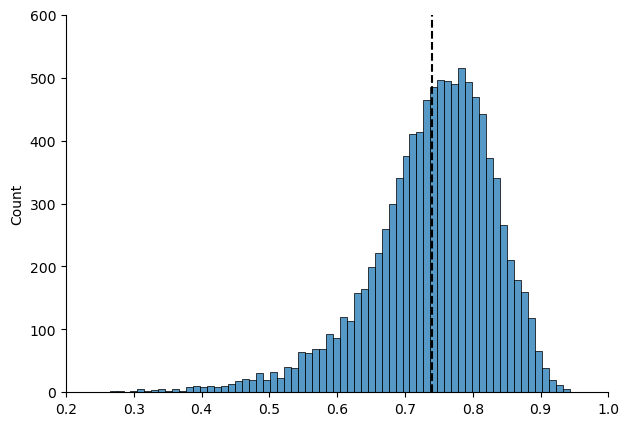

In [7]:
import matplotlib as mpl

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

fig=plt.figure(figsize=(7,5), dpi= 100, facecolor='w', edgecolor='k')
sns.histplot(correlation)
plt.plot([np.mean(correlation),np.mean(correlation)],[0,600],'k--')
plt.xlim([0.2,1])
plt.ylim([0,600])

In [8]:
np.mean(correlation)

0.7394363735000157